<a href="https://colab.research.google.com/github/dudesparsh/100-days-of-code/blob/master/Final_Sentiment_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing FastAI
from fastai.text import *

In [3]:
# Setting the path  to pwd for later use
path = Path('/content')
path.ls()


[PosixPath('/content/.config'), PosixPath('/content/sample_data')]

## Data Preprocessing

In [0]:
# Taking the given dataset
df = pd.read_csv(path/'data_twitter.csv')
df.head()


,text,sentiment,Unnamed: 2
0,#Job #Cambridge Secret shopper position: Bosto...,0,NaN
1,RT @TheBostonPops President @billclinton Comin...,0,NaN
2,There's some weirdos down in Boston for real,0,NaN
3,RT @kcgirl2003 Colin's new boat!! #pendant #bo...,0,NaN
4,RT @caulkthewagon Now all of mainstream Boston...,0,NaN


In [0]:
#Dropping the column 2 : Nan values
df.drop(df.columns[2], axis = 1, inplace = True) 

In [0]:
df

,text,sentiment
0,#Job #Cambridge Secret shopper position: Bosto...,0
1,RT @TheBostonPops President @billclinton Comin...,0
2,There's some weirdos down in Boston for real,0
3,RT @kcgirl2003 Colin's new boat!! #pendant #bo...,0
4,RT @caulkthewagon Now all of mainstream Boston...,0
...,...,...
16213,@MzSexxyJas We could be looking at 3 feet of s...,NaN
16214,"""@MsStacyThatsMe: @4evergraceJONES Lol We're C...",NaN
16215,RT @BostonDotCom This is according to @AP : Su...,NaN
16216,Thanks RT @laVisualiza: Boston is truly a beau...,NaN


In [0]:
# Making a sub dataset for testing purpose ( Unlabelled tweets)
test_df = df.loc[4000:,:]
len(test_df)

12218

In [0]:
test_df

,text,sentiment
4000,RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...,police tracked him by bloody trail http://t....
4001,Boston Scientific Corporation (BSX) Profits Be...,Revenues Miss Expectations http://t.co/86r9Z6...
4002,RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...,say had nothing to do with the #BostonBombing...
4003,RT @GlobeMetro BREAKING NEWS: Shots fired in W...,source says Boston Marathon terror bomb suspe...
4004,BREAKING NEWS: Shots fired in Watertown,source says Boston Marathon terror bomb suspe...
...,...,...
16213,@MzSexxyJas We could be looking at 3 feet of s...,NaN
16214,"""@MsStacyThatsMe: @4evergraceJONES Lol We're C...",NaN
16215,RT @BostonDotCom This is according to @AP : Su...,NaN
16216,Thanks RT @laVisualiza: Boston is truly a beau...,NaN


In [0]:
# Dropping the column 1 : label for test set, since it's Nan till now
test_df.drop(test_df.columns[1], axis = 1, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
test_df

,text
4000,RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...
4001,Boston Scientific Corporation (BSX) Profits Be...
4002,RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...
4003,RT @GlobeMetro BREAKING NEWS: Shots fired in W...
4004,BREAKING NEWS: Shots fired in Watertown
...,...
16213,@MzSexxyJas We could be looking at 3 feet of s...
16214,"""@MsStacyThatsMe: @4evergraceJONES Lol We're C..."
16215,RT @BostonDotCom This is according to @AP : Su...
16216,Thanks RT @laVisualiza: Boston is truly a beau...


In [0]:
# Saving the file
test_df.to_csv('test.csv')

In [0]:
#Resetting the index
#test_df =test_df.reset_index(drop=True)

In [0]:
test_df

,text
0,RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...
1,Boston Scientific Corporation (BSX) Profits Be...
2,RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...
3,RT @GlobeMetro BREAKING NEWS: Shots fired in W...
4,BREAKING NEWS: Shots fired in Watertown
...,...
12213,@MzSexxyJas We could be looking at 3 feet of s...
12214,"""@MsStacyThatsMe: @4evergraceJONES Lol We're C..."
12215,RT @BostonDotCom This is according to @AP : Su...
12216,Thanks RT @laVisualiza: Boston is truly a beau...


In [0]:
#Saving the test data file
test_df.to_csv('test.csv')

## Classification Model Starts

In [0]:
# Using the test set to work further ( Generated above )
test_set = pd.read_csv(path/'test.csv')


In [6]:

# Loading the model saved earlier : export.pkl
# Just mention the folder path where the export.pkl is present
# Example, Here is was : /content/drive/My Drive/tweeter/export.pkl

learn = load_learner('/content/drive/My Drive/tweeter')


In [0]:
# Copying data to new dataframe to continue
df2 = test_set["text"]



In [10]:
df2

0        RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...
1        Boston Scientific Corporation (BSX) Profits Be...
2        RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...
3        RT @GlobeMetro BREAKING NEWS: Shots fired in W...
4                  BREAKING NEWS: Shots fired in Watertown
                               ...                        
12213    @MzSexxyJas We could be looking at 3 feet of s...
12214    "@MsStacyThatsMe: @4evergraceJONES Lol We're C...
12215    RT @BostonDotCom This is according to @AP : Su...
12216    Thanks RT @laVisualiza: Boston is truly a beau...
12217    @chelseahandler, you're a class act. #PrayForB...
Name: text, Length: 12218, dtype: object

In [0]:
# Making an empty dataframe where we can store the data
test_final = pd.DataFrame()

In [0]:
# Doing classification of tweets
# learn : Model Name, predict : Function for classifying, df2[] = dataframe, i : Index
# Here No of Columns = 12218
len = 12218
for i in range(len):
  test_final[i] = learn.predict(df2[i])    


In [15]:
# The dataframe created will be in the below format, so we need to transpose
# test_final

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,1,1,1,1,0,0,1
1,tensor(1),tensor(0),tensor(1),tensor(1),tensor(1),tensor(1),tensor(1),tensor(0),tensor(0),tensor(1)
2,"[tensor(5.7138e-07), tensor(1.0000)]","[tensor(0.9701), tensor(0.0299)]","[tensor(0.0010), tensor(0.9990)]","[tensor(6.1257e-05), tensor(0.9999)]","[tensor(6.6978e-05), tensor(0.9999)]","[tensor(3.4367e-05), tensor(1.0000)]","[tensor(4.7770e-05), tensor(1.0000)]","[tensor(0.6125), tensor(0.3875)]","[tensor(0.9763), tensor(0.0237)]","[tensor(0.2542), tensor(0.7458)]"


In [0]:
#Transposing the dataframe
test_final = test_final.T

In [27]:
# Predicted values, tensor(i) : i represents the class
# Columns 2 represents : Probability_of_0, Probability_of_1
test_final

,0,1,2
0,1,tensor(1),"[tensor(5.7138e-07), tensor(1.0000)]"
1,0,tensor(0),"[tensor(0.9701), tensor(0.0299)]"
2,1,tensor(1),"[tensor(0.0010), tensor(0.9990)]"
3,1,tensor(1),"[tensor(6.1257e-05), tensor(0.9999)]"
4,1,tensor(1),"[tensor(6.6978e-05), tensor(0.9999)]"
...,...,...,...
12212,1,tensor(1),"[tensor(0.1293), tensor(0.8707)]"
12213,0,tensor(0),"[tensor(0.7429), tensor(0.2571)]"
12214,1,tensor(1),"[tensor(0.0006), tensor(0.9994)]"
12215,1,tensor(1),"[tensor(7.4355e-07), tensor(1.0000)]"


In [0]:
# Naming the columns

df2.columns = ['text']

test_final.columns = ['sentiment', 'vector', 'probability']

In [0]:
# Concatenating the results with the tweets
final = pd.concat([df2, test_final], axis=1)

In [30]:
final

,text,sentiment,vector,probability
0,RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...,1,tensor(1),"[tensor(5.7138e-07), tensor(1.0000)]"
1,Boston Scientific Corporation (BSX) Profits Be...,0,tensor(0),"[tensor(0.9701), tensor(0.0299)]"
2,RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...,1,tensor(1),"[tensor(0.0010), tensor(0.9990)]"
3,RT @GlobeMetro BREAKING NEWS: Shots fired in W...,1,tensor(1),"[tensor(6.1257e-05), tensor(0.9999)]"
4,BREAKING NEWS: Shots fired in Watertown,1,tensor(1),"[tensor(6.6978e-05), tensor(0.9999)]"
...,...,...,...,...
12213,@MzSexxyJas We could be looking at 3 feet of s...,0,tensor(0),"[tensor(0.7429), tensor(0.2571)]"
12214,"""@MsStacyThatsMe: @4evergraceJONES Lol We're C...",1,tensor(1),"[tensor(0.0006), tensor(0.9994)]"
12215,RT @BostonDotCom This is according to @AP : Su...,1,tensor(1),"[tensor(7.4355e-07), tensor(1.0000)]"
12216,Thanks RT @laVisualiza: Boston is truly a beau...,0,tensor(0),"[tensor(0.9992), tensor(0.0008)]"


In [0]:
# Saving the classfied_tweets to csv file
final.to_csv('final.csv')

In [0]:
final.drop(final.columns[[2,3]], axis = 1, inplace = True) 

In [38]:
final.head()

,text,sentiment
0,RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...,1
1,Boston Scientific Corporation (BSX) Profits Be...,0
2,RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...,1
3,RT @GlobeMetro BREAKING NEWS: Shots fired in W...,1
4,BREAKING NEWS: Shots fired in Watertown,1


In [0]:
final.columns = ['Text', 'Sentiment']

In [0]:
# This is our final file, containing the Tweets with their classification
final.to_csv('sentiment_final.csv')

In [42]:
final

,Text,Sentiment
0,RT @washtimes LATEST UPDATES: Dzhokhar A. Tsar...,1
1,Boston Scientific Corporation (BSX) Profits Be...,0
2,RT @Yasmeen973 RT @arafrika: #Dagestan and #Ch...,1
3,RT @GlobeMetro BREAKING NEWS: Shots fired in W...,1
4,BREAKING NEWS: Shots fired in Watertown,1
...,...,...
12213,@MzSexxyJas We could be looking at 3 feet of s...,0
12214,"""@MsStacyThatsMe: @4evergraceJONES Lol We're C...",1
12215,RT @BostonDotCom This is according to @AP : Su...,1
12216,Thanks RT @laVisualiza: Boston is truly a beau...,0


## Data Analysis 

In [48]:
# Since the datatype of sentiment is object, we need to convert it to integer or float to work further
# We convert if to string
dataTypeObj = final.dtypes['Sentiment']
print('Data type of each column Sentiment in the Dataframe :')
print(dataTypeObj)

Data type of each column Sentiment in the Dataframe :
object


In [54]:
final["Sentiment"] = final["Sentiment"].astype(str)
print(final.dtypes)


Text         object
Sentiment    object
dtype: object


In [0]:
#Analyzing text statistics
# Number of characters present in each tweet
#final_1 corresponds to Tweet classified as 1
final_1 = final.loc[final['Sentiment'] == '0'] 
final_0 = final.loc[final['Sentiment'] == '1'] 





###final_1 corresponds to Tweet classified as 1
###final_0 corresponds to Tweet classified as 0


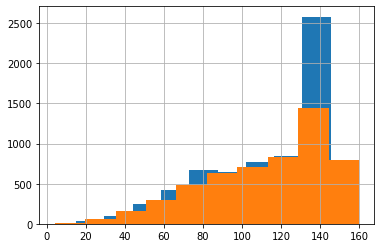

In [58]:
# Analysing length of tweets
final_1['Text'].str.len().hist()
final_0['Text'].str.len().hist()
# Orange : 0 , Blue : 1

In [0]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')


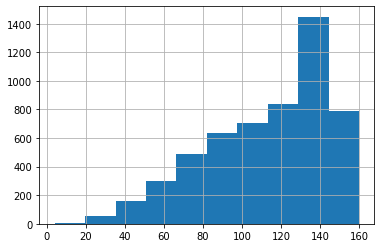

In [62]:
# For generating histogram for only one category : 0
#final_0['Text'].str.len().hist()


In [0]:
# Function for the stopword chart
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


 ## Stopwords
Stopwords are the words that are most commonly used in any language such as : a, in , the

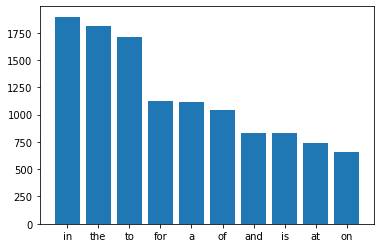

In [77]:
# Stopwords for category 1
plot_top_stopwords_barchart(final_1['Text'])


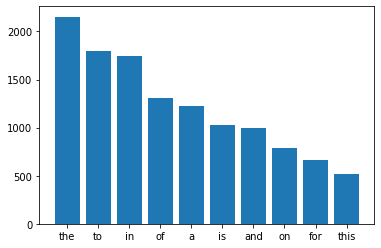

In [78]:
# Stopwords for category 1

plot_top_stopwords_barchart(final_0['Text'])


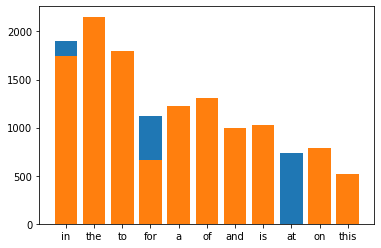

In [90]:
plot_top_stopwords_barchart(final_1['Text'])
plot_top_stopwords_barchart(final_0['Text'])
# 0 : Orange, 1 : Blue

In [80]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


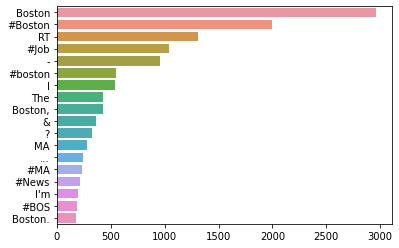

In [81]:
# Plot for non stopwords : Category : 1
plot_top_non_stopwords_barchart(final_1['Text'])


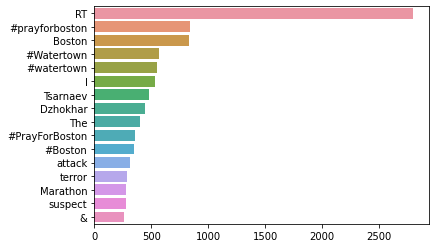

In [82]:
# Plot for non stopwords : Category : 2

plot_top_non_stopwords_barchart(final_0['Text'])


#Ngram exploration

Ngrams are simply contiguous sequences of n words. For example “riverbank”, ” The three roads” etc.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.


In [0]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)


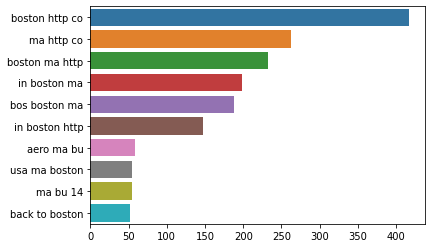

In [89]:
# n-gram : plot_top_ngrams_barchart(dataframe, n)
# n =2 bigrams
# Here n = 3 : trigrams
# n-gram for Class : 1 
plot_top_ngrams_barchart(final_1['Text'],3)


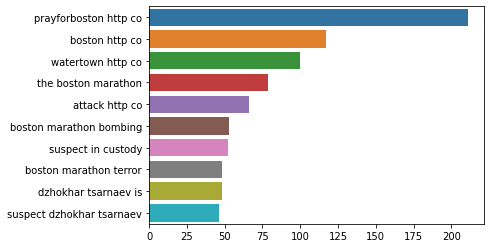

In [88]:
# n-gram for Class : 0

plot_top_ngrams_barchart(final_0['Text'],3)
